In [1]:
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('../')

from pragmaticml import confusion_matrix

In [2]:
%matplotlib inline
sns.set()

In [3]:
pima_df = pd.read_csv('../data/pima.csv', dtype = {'diabetes': 'int8'})
pima_df.head(3)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1


In [4]:
feature_cols = ['num_preg', 'insulin', 'bmi', 'age']
X = pima_df[feature_cols]
y = pima_df.diabetes

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# Confusion Matrix
> Table that describes the performance of a classification model  
> And maybe point out the mistakes the model is making

> Here Positive Class is 1 (Diabetic)

In [6]:
confusion_matrix.show(y_test, y_pred)

,0,1
0,118,12
1,47,15


**True Positive** - Intersection of the class's row and column  
_Correctly predicted as having diabetes_

In [7]:
confusion_matrix.tp(y_test, y_pred, 1)

15

**True Negative** - Sum of all rows and columns excluding that class's row and column  
_Correctly predicted as not having diabetes_

In [8]:
confusion_matrix.tn(y_test, y_pred, 1)

118

**False Positive | Type 1 Error** - Sum of values in the class's column  
_Incorrectly predicted as has diabetes when there was no diabetes_

In [9]:
confusion_matrix.fp(y_test, y_pred, 1)

12

**False Negative | Type 2 Error** - Sum of values in the class's row  
_Incorrectly predicted as no diabetes when there was diabetes_

In [10]:
confusion_matrix.fn(y_test, y_pred, 1)

47

# Metrics computed from a Confusion Matrix

> Since we can't tell a model to choose from the best confusion matrix  
> We compute some metrics which then can be used to select the best model

**Sensitivity | Recall - TP / (TP + FN)**  
_When actual value is positive, How often is the prediction correct?_

In [11]:
confusion_matrix.recall(y_test, y_pred, 1)

0.24193548387096775

**Specificity - TN / (TN + FP)**  
_When the actual value is negative, How often is the prediction correct?_

In [12]:
confusion_matrix.specificity(y_test, y_pred, 1)

0.90769230769230769

**Precision - TP / (TP + FP)**  
When a positive value is predicted, how often is the prediction correct?

In [13]:
confusion_matrix.precision(y_test, y_pred, 1)

0.55555555555555558

# All In One

In [14]:
confusion_matrix.describe(y_test, y_pred)

,TP,TN,FN,FP,Recall,Specificity,Precision
0,118,15,12,47,0.907692,0.241935,0.715152
1,15,118,47,12,0.241935,0.907692,0.555556


# Visualization

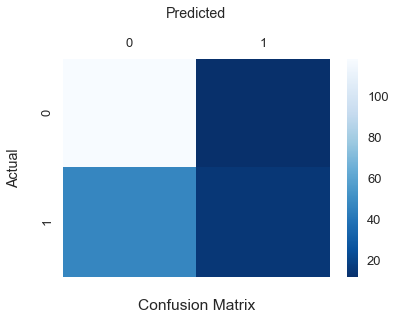

In [15]:
confusion_matrix.visualize(y_test, y_pred)

# Which Metrics to Focus On?
_Depends on Business Requirements_
- **Spam Filter** - (Positive Class 'spam') - Optimize **Precision & Specificity**  
  bcoz - FN (Spam goes to Inbox) is more preferable than FP (Non Spam gets caught as spam)
- **Fraud Transaction Detector** - (Positive Class 'fraud') - Optimize **Sensitivity**  
  bcoz - FP (Normal Transaction marked Fraud) is more prefereble than FN (Fraud not detected)